In [49]:
import pandas as pd
import plotnine as pn

In [50]:
df = pd.read_csv(
    "all_data.csv",
)
df.head()

,density,edginess,citations_per_year,is_center
0,34.917230,0.700973,1.000000,True
1,27.926897,0.734716,69.090909,False
2,33.935427,0.640500,1.666667,False
3,32.356449,0.743944,1.000000,False
4,34.283166,0.636759,8.000000,False


In [51]:
binned_density = pd.cut(df.density, bins=50)
df["binned_density"] = binned_density
df.head()

,density,edginess,citations_per_year,is_center,binned_density
0,34.917230,0.700973,1.000000,True,"(33.791, 35.245]"
1,27.926897,0.734716,69.090909,False,"(26.518, 27.973]"
2,33.935427,0.640500,1.666667,False,"(33.791, 35.245]"
3,32.356449,0.743944,1.000000,False,"(32.336, 33.791]"
4,34.283166,0.636759,8.000000,False,"(33.791, 35.245]"


In [52]:
counts = df.binned_density.value_counts()
keys = list(counts.to_dict().keys())
print(keys[0])
print(29.5 in keys[0])

(29.427, 30.882]
True


In [53]:
density_scores = []
for idx, row in df.iterrows():
    d = row["density"]
    bin = row["binned_density"]
    count = counts[bin]
    density_scores.append(count)

df["density_freq"] = density_scores
df.head()

,density,edginess,citations_per_year,is_center,binned_density,density_freq
0,34.917230,0.700973,1.000000,True,"(33.791, 35.245]",637
1,27.926897,0.734716,69.090909,False,"(26.518, 27.973]",717
2,33.935427,0.640500,1.666667,False,"(33.791, 35.245]",637
3,32.356449,0.743944,1.000000,False,"(32.336, 33.791]",845
4,34.283166,0.636759,8.000000,False,"(33.791, 35.245]",637


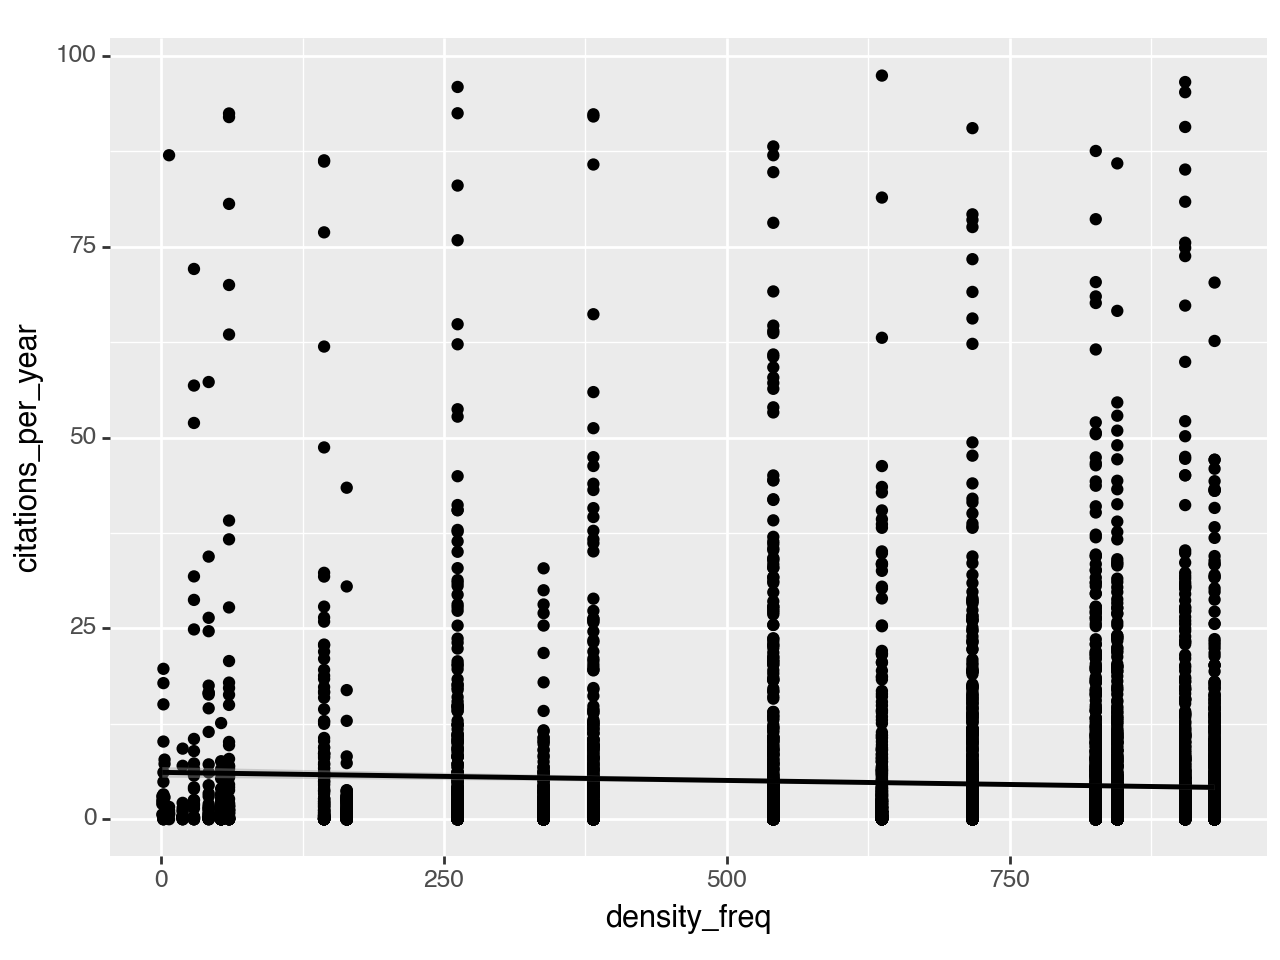

<Figure Size: (640 x 480)>

In [54]:
(
    pn.ggplot(
        df[df.citations_per_year < 100],
        pn.aes(x="density_freq", y="citations_per_year")
    )
    + pn.geom_point()
    + pn.geom_smooth()
)